In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/varya_hai/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/varya_hai/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
ads_data = pd.read_csv('/Users/varya_hai/Karpov.courses/lesson_5_ads_data.csv.zip',compression='zip')

In [4]:
ads_data.head()

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29


In [5]:
ads_data['date'] = pd.to_datetime(ads_data.date)

In [6]:
ads_data['full_date'] = pd.to_datetime(ads_data.time,unit='s')

In [7]:
ads_data\
        .groupby(['date','event'],as_index=False)\
        .agg({'ad_id':'count'})\
        .pivot(index='date',columns='event',values='ad_id')\
        .reset_index()

event,date,click,view
0,2019-04-01,735,34832
1,2019-04-02,1518,145811
2,2019-04-03,1678,214851
3,2019-04-04,1517,126182
4,2019-04-05,501595,1783288
5,2019-04-06,80420,284287


In [8]:
ads_data\
        .groupby('date',as_index=False)\
        .agg({'ad_id':'nunique'})\
        .rename(columns={'ad_id':'unique_ads'})

,date,unique_ads
0,2019-04-01,49
1,2019-04-02,146
2,2019-04-03,179
3,2019-04-04,150
4,2019-04-05,131
5,2019-04-06,61


In [9]:
ads_data\
        .groupby('date',as_index=False)\
        .agg({'campaign_union_id':'nunique'})\
        .rename(columns={'campaign_union_id':'unique_campaign'})

,date,unique_campaign
0,2019-04-01,49
1,2019-04-02,146
2,2019-04-03,177
3,2019-04-04,147
4,2019-04-05,130
5,2019-04-06,60


In [10]:
ads_data[ads_data.date=='2019-04-05']\
        .groupby('ad_id',as_index=False)\
        .agg({'time':'count'})\
        .sort_values('time',ascending=False)\
        .head()

,ad_id,time
108,112583,2166611
27,29927,27186
65,44635,8268
81,46583,7327
66,44956,5656


In [11]:
ads_data[ads_data.ad_id==112583]\
        .groupby('date',as_index=False)\
        .agg({'time':'count'})

,date,time
0,2019-04-05,2166611
1,2019-04-06,348613


In [12]:
ads = ads_data\
        .groupby(['ad_id','event'],as_index=False)\
        .agg({'time':'count'})\
        .pivot(index='ad_id',columns='event',values='time')\
        .reset_index()
ads['ctr'] = round(ads.click / ads.view * 100, 2)
ads.sort_values('ctr',ascending=False).head(10)

event,ad_id,click,view,ctr
289,112583,580436.0,1934788.0,30.00
324,119450,258.0,1254.0,20.57
125,38575,43.0,257.0,16.73
144,40968,29.0,217.0,13.36
207,45642,42.0,344.0,12.21
283,110924,11.0,95.0,11.58
194,45043,28.0,245.0,11.43
96,35034,112.0,997.0,11.23
5,4585,53.0,476.0,11.13
328,120347,236.0,2168.0,10.89


In [13]:
ads.ctr.mean()

2.0626470588235297

In [14]:
ads.ctr.median()

1.0750000000000002

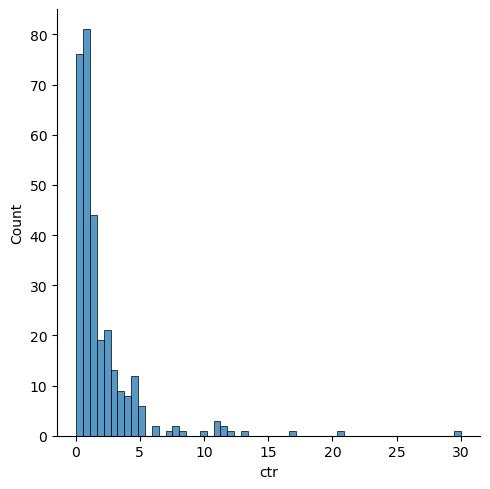

In [15]:
sns.displot(ads.ctr)

In [16]:
ads = ads.fillna(0)

In [17]:
ads_data[ads_data.ad_id.isin(ads[ads.view==0].ad_id)].platform.value_counts()

platform
android    141
ios         92
web         53
Name: count, dtype: int64

# Задания

In [ ]:
retail = pd.read_csv('path_to_file',encoding='ISO-8859-1')
retail_columns = retail.columns

In [ ]:
retail.duplicated().sum()
retail = retail.drop_duplicates()

In [ ]:
len(retail[retail.InvoiceNo.str[0]=='C'])

In [ ]:
retail = retail[retail.Quantity>0]
len(retail)

In [ ]:
n = retail.InvoiceNo.quantile(q=0.8)

germany_top = retail.query('Country=="Germany"')\
      .groupby('CustomerID',as_index=False)\
      .agg({'InvoiceNo':'nunique'})\
      .query('InvoiceNo>@n')\
      .CustomerID

In [ ]:
top_retail_germany = germany_top.merge(retail,on='CustomerID')

In [ ]:
top_retail_germany.query('StockCode!=POST').StockCode.value_counts()

In [ ]:
retail['Revenue'] = retail.Quantity * retail.UnitPrice

In [ ]:
print(*retail.groupby('IncoiceNo', as_index=False)
      .agg({'Revenue':'sum'})
      .sort_values('Revenue')
      ['Revenue'],
      sep=', ')

# Минипроект

In [18]:
df = pd.read_csv('/Users/varya_hai/Karpov.courses/5_transaction_data.csv')
df['date']=pd.to_datetime(df.date)
df.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [19]:
df.transaction.unique()

array(['cancelled', 'successfull', 'error'], dtype=object)

Text(0.5, 1.0, 'Наблюдения по уровням транзакции')

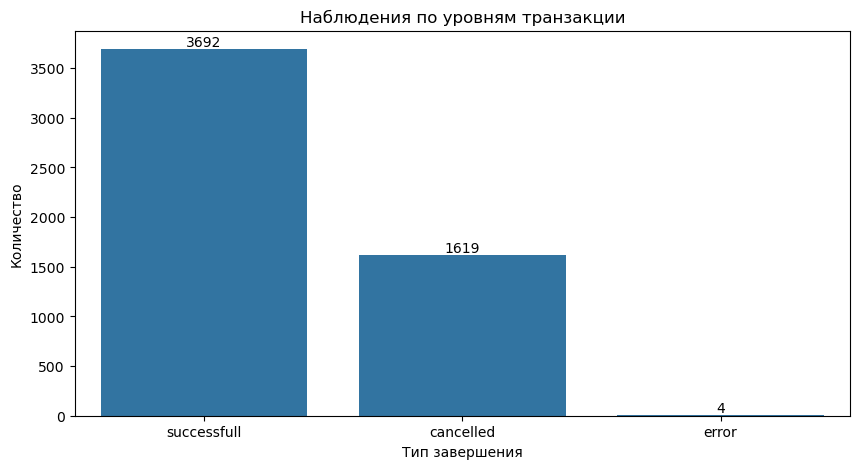

In [20]:
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(x=df.transaction.value_counts().index,y=df.transaction.value_counts().values)
ax.set_xlabel('Тип завершения')
ax.set_ylabel('Количество')
ax.bar_label(ax.containers[0])
ax.set_title('Наблюдения по уровням транзакции')

In [21]:
s_transactions = df\
    .query('transaction=="successfull"')\
    .groupby('name',as_index=False)\
    .size()

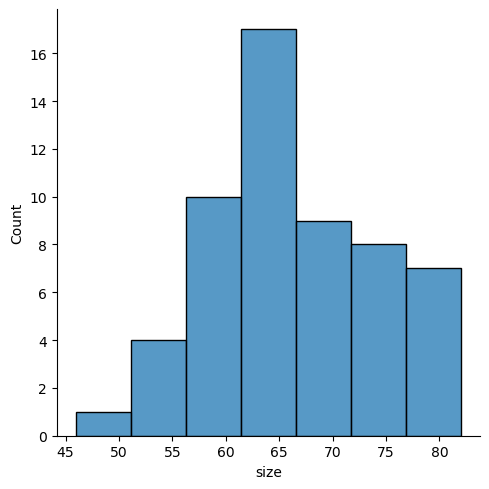

In [22]:
sns.displot(data=s_transactions,x='size')

In [23]:
s_transactions.describe()

,size
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


In [24]:
df = pd.read_csv('/Users/varya_hai/Karpov.courses/5_transaction_data_updated.csv',
                parse_dates=['date'])
df.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [26]:
df = df.fillna(0)

In [27]:
user_vs_minute_pivot = df\
    .groupby(['name','minute'],as_index=False)\
    .agg({'transaction':'count'})\
    .pivot(index='minute',columns='name',values='transaction')\
    .reset_index()\
    .fillna(0)

In [28]:
user_vs_minute_pivot.head()

name,minute,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
0,0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


/var/folders/w0/ntgk1ch94_q3p2ylkj5h0j740000gn/T/ipykernel_10960/2876328488.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='minute',y=user_vs_minute_pivot.sum(axis=1),data=user_vs_minute_pivot,palette='husl')


Text(0.5, 1.0, 'Number of Transactions per Minute')

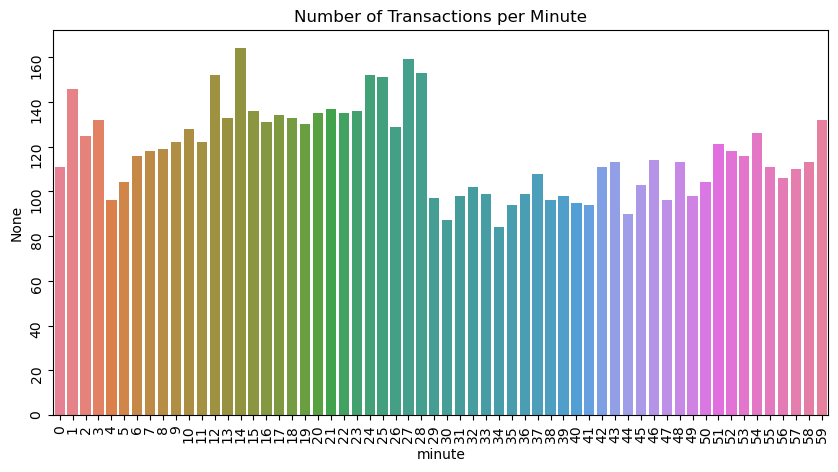

In [29]:
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(x='minute',y=user_vs_minute_pivot.sum(axis=1),data=user_vs_minute_pivot,palette='husl')
ax.tick_params(rotation=90)
ax.set_title('Number of Transactions per Minute')

In [30]:
df['true_minute'] = df.date.dt.hour*60 + df.date.dt.minute

In [31]:
df.head()

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17


In [32]:
per_day = df\
    .groupby('true_minute',as_index=False)\
    .agg({'transaction':'count'})

/var/folders/w0/ntgk1ch94_q3p2ylkj5h0j740000gn/T/ipykernel_10960/2500321089.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='true_minute',y=per_day.sum(axis=1),data=per_day,palette='husl')


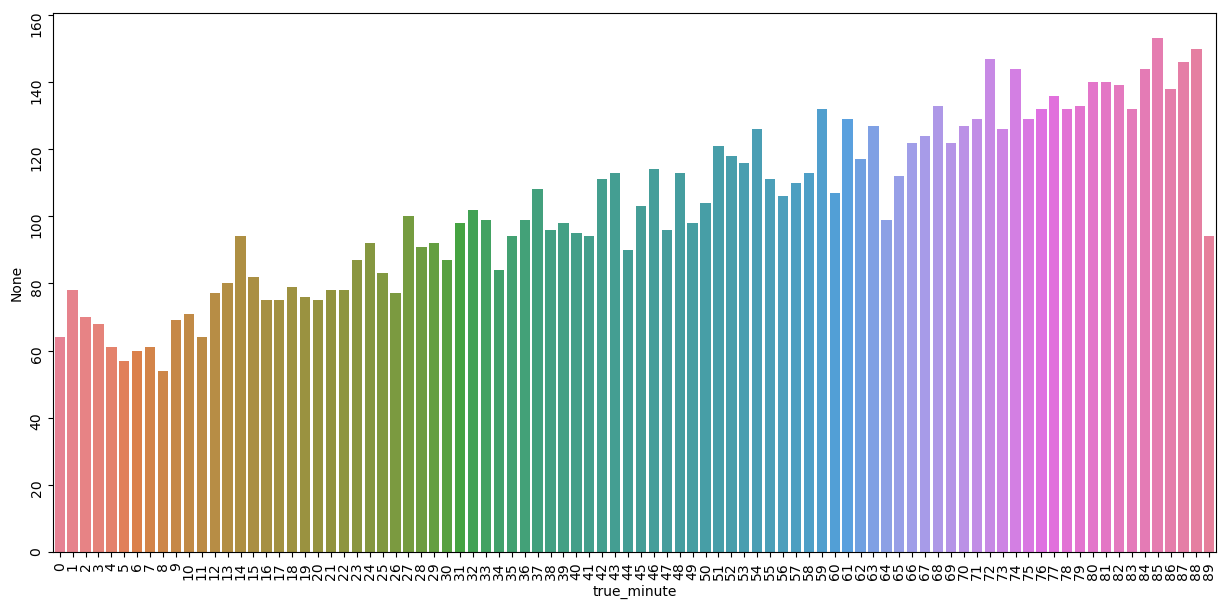

In [33]:
fig,ax=plt.subplots(figsize=(15,7))
sns.barplot(x='true_minute',y=per_day.sum(axis=1),data=per_day,palette='husl')
ax.tick_params(rotation=90)